In [1]:
pwd

'/mnt/md0/isshamie/Projects/Mito_Trace/workflow/notebooks/clone_af_dendrograms'

In [2]:

# INDIR = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/"
# OUTDIR = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/barcodes/btwnClones_dendro_dt_0.6/"
# DONOR = 0
# dendroThresh=0.6

#clones_meta = '/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/results/clones_summary/feb23_2022/clones_summary.csv'
#clones_indir = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/"
#clone_sizes_in_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/annotation_clones/clone_counts/minCellConds_1/clone_sizes.csv"
# INDIR = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2//data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_30/"
# OUTDIR = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_30/barcodes/btwnClones_dendro_dt_dynamic"
# DONOR = 0

INDIR = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_30"
OUTDIR = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_30/barcodes/btwnClones_dendro_dt_dynamic"
DONOR = 0

dendroThresh = "dynamic"

# INDIR = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_30"
# OUTDIR = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_30/barcodes/btwnClones_dendro_dt_0.6"
# DONOR = 1
#dendroThresh = "dynamic" #0.6

verbose=False

mt_ref="/data/Mito_Trace/data/processed/genomes/mtMasked/GRCh38_MT_blacklist_A2_2020/chrM.fasta"

In [3]:
import src.utils.variant_utils as vu
import src.utils.dendro_clust as dc

import mplh.cluster_help as ch
import mplh.fig_utils as fu

from os.path import join, exists, dirname
from glob import glob
import pickle
import os
import vireoSNP
import numpy as np
from scipy import sparse
from scipy.io import mmread
import matplotlib.pyplot as plt
from scipy.stats import hypergeom
print(vireoSNP.__version__)
import pandas as pd
import seaborn as sns
from vireoSNP import Vireo
np.set_printoptions(formatter={'float': lambda x: format(x, '.5f')})
import scipy
from itertools import combinations
#from src.utils import utils  as ut

fig_utils from mplh
0.5.6


In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
out_f = join(OUTDIR, f"donor{DONOR}")

### Load cells_meta 
### Create clones_meta - get number of cells in a clone and donor

In [6]:
cells_meta = pd.read_csv(join(INDIR, "cells_meta.tsv"), sep="\t")
cells_meta["lineage"] = cells_meta.apply(lambda x: f'{x["donor"]}_{x["lineage"]}', axis=1)
cells_meta

,ID,lineage,donor,condition
0,AAACTGCCAAACCTAC-1_Flt3l,0_0,0,Flt3l
1,AAACTGCCATGTGGGA-1_Flt3l,0_0,0,Flt3l
2,AAAGATGCATCCTGGG-1_Flt3l,0_0,0,Flt3l
3,AAAGATGTCAATTGGC-1_Flt3l,0_0,0,Flt3l
4,AAAGGATCATTCCCGT-1_Flt3l,0_0,0,Flt3l
...,...,...,...,...
12688,CATTCATGTTTCCACC-1_Input,1_45,1,Input
12689,GACTAGTAGTATACCC-1_Input,1_45,1,Input
12690,AAGGAGCTCAGATACC-1_Input,1_46,1,Input
12691,ATCCTGCTCTGATCTT-1_Input,1_46,1,Input


In [7]:
clones_meta_df = pd.DataFrame(cells_meta.groupby("lineage").size(), columns=["size"]) #, index=["size"])
clones_meta_df["donor"] = [x.split("_")[0] for x in clones_meta_df.index]
clones_meta_df["donor"] = clones_meta_df["donor"].astype(int)
clones_meta_df

,size,donor
lineage,,
0_0,799,0
0_1,766,0
0_10,132,0
0_100,4,0
0_101,6,0
...,...,...
1_5,265,1
1_6,263,1
1_7,169,1


In [8]:
curr_clones = clones_meta_df[clones_meta_df["donor"]==DONOR]
# cells_meta = pd.read_csv(join(INDIR, "cells_meta.tsv"), sep='\t')#.sort_values(["donor", "lineage"])
curr_labels = cells_meta[cells_meta["donor"]==DONOR]

In [9]:
# curr_clones = clones_meta_df[clones_meta_df["donor"]==DONOR].set_index("lineage")
# curr_clones

## Load AF and DP

In [10]:
af_indir = join(INDIR, "sc_af", f"donor{DONOR}")
AF_df = pd.read_csv(join(af_indir, "af.tsv"), index_col=0, sep="\t")
DP_df = pd.read_csv(join(af_indir, "dp.tsv"), index_col=0, sep="\t")


### Functions to get mean and median

In [11]:
def calc_mean(cells, af):
    #print(cells.head())
    return af.loc[:,cells["ID"].values].mean(axis=1)

def calc_median(cells, af):
    #print(cells.head())
    return af.loc[:,cells["ID"].values].median(axis=1)

### Calculate clone-barcode mean

In [12]:
mean_af = curr_labels.groupby(["lineage"]).apply(calc_mean, af=AF_df)
anno = mean_af.reset_index()[["lineage"]]

# Remove clones that have all 0
# print('mean_af shape', mean_af.shape)
# mean_af = mean_af.loc[~((mean_af==0).all(axis=1))]
# curr_clones = curr_clones.loc[mean_af.index]
# print('mean_af shape after rm 0', mean_af.shape)

mean_dp = curr_labels.groupby(["lineage"]).apply(calc_mean, af=np.log2(DP_df+1))
mean_dp = mean_dp.loc[mean_af.index, mean_af.columns]

#mean_dp = mean_dp.reset_index(drop=True)
anno_dp = mean_dp.reset_index()[["lineage"]]
na_cells = curr_labels.loc[curr_labels["lineage"].isnull()]
na_mean_af = na_cells.groupby("condition").apply(calc_mean, af=AF_df)

if not (na_mean_af.shape[0] == 0):
    print('na shape', na_mean_af.shape)
    na_anno = pd.concat((anno,pd.DataFrame({"lineage":["None"]*len(na_mean_af.index)})), ignore_index=True)
    na_concat = pd.concat((mean_af.reset_index(drop=True), na_mean_af.reset_index(drop=True)), ignore_index=True)
    na_mean_dp = na_cells.groupby("condition").apply(calc_mean, af=np.log2(DP_df+1))
    na_dp_concat = pd.concat((mean_dp, na_mean_dp.reset_index(drop=True)), ignore_index=True)
else:
    na_anno = anno
    na_concat = mean_af.reset_index(drop=True)
    na_dp_concat = mean_dp
     
mean_af  

Variant,13188T,4917G,13434G,12283T,2857G,1661G,14269C,1438G,16296T,13068G,...,799G,7485C,11761T,204C,14985A,983T,2514A,5357C,6356T,16387G
lineage,,,,,,,,,,,,,,,,,,,,,
0_0,0.984354,0.008886,0.000074,0.001136,0.000658,0.000148,0.000558,0.984884,0.011556,0.000217,...,0.000318,0.000239,0.976658,0.979252,0.000291,0.000479,0.001308,0.000337,0.000374,0.001033
0_1,0.991734,0.002544,0.000253,0.001429,0.001323,0.000146,0.001043,0.998408,0.000826,0.000833,...,0.000604,0.000805,0.993537,0.997436,0.000416,0.000620,0.001514,0.000672,0.000640,0.001406
0_10,0.986768,0.008565,0.000371,0.001684,0.001138,0.000000,0.000592,0.992000,0.001645,0.000545,...,0.000628,0.000473,0.985491,0.997297,0.000594,0.000853,0.003040,0.002224,0.000487,0.001233
0_100,0.882929,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0_101,1.000000,0.053127,0.000000,0.000000,0.000000,0.000000,0.004902,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.985714,1.000000,0.002488,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0_95,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023810,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.995671,1.000000,0.003876,0.010103,0.000000,0.000000,0.000000,0.000000
0_96,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0_97,0.997246,0.002026,0.000251,0.002077,0.001505,0.000495,0.000483,0.999894,0.000373,0.000982,...,0.000220,0.000633,0.996305,0.999051,0.000342,0.000452,0.001756,0.000681,0.001032,0.000793


In [13]:
# Get variant types
variants_df = vu.add_ref_to_variants(variants=mean_af.columns.values,
                                     mt_df=vu.load_mt_ref(mt_ref))

variants_df = vu.type_of_variants(variants_df, to_preproc=False)

In [14]:
# mean_af.to_csv(out_f+".initInds.mean.csv")

# curr_clones[["donor","size", "log2_fold","-log10(fold p_adj)", "shuffle_sig", 
#              "ncells"]+ list(curr_labels["condition"].unique())].to_csv(out_f+".initInds.indsMeta.csv")

### Cluster to get dendro results

In [15]:
mean_af

Variant,13188T,4917G,13434G,12283T,2857G,1661G,14269C,1438G,16296T,13068G,...,799G,7485C,11761T,204C,14985A,983T,2514A,5357C,6356T,16387G
lineage,,,,,,,,,,,,,,,,,,,,,
0_0,0.984354,0.008886,0.000074,0.001136,0.000658,0.000148,0.000558,0.984884,0.011556,0.000217,...,0.000318,0.000239,0.976658,0.979252,0.000291,0.000479,0.001308,0.000337,0.000374,0.001033
0_1,0.991734,0.002544,0.000253,0.001429,0.001323,0.000146,0.001043,0.998408,0.000826,0.000833,...,0.000604,0.000805,0.993537,0.997436,0.000416,0.000620,0.001514,0.000672,0.000640,0.001406
0_10,0.986768,0.008565,0.000371,0.001684,0.001138,0.000000,0.000592,0.992000,0.001645,0.000545,...,0.000628,0.000473,0.985491,0.997297,0.000594,0.000853,0.003040,0.002224,0.000487,0.001233
0_100,0.882929,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0_101,1.000000,0.053127,0.000000,0.000000,0.000000,0.000000,0.004902,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.985714,1.000000,0.002488,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0_95,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023810,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.995671,1.000000,0.003876,0.010103,0.000000,0.000000,0.000000,0.000000
0_96,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0_97,0.997246,0.002026,0.000251,0.002077,0.001505,0.000495,0.000483,0.999894,0.000373,0.000982,...,0.000220,0.000633,0.996305,0.999051,0.000342,0.000452,0.001756,0.000681,0.001032,0.000793


In [16]:
if mean_af.shape[0] == 1 or  mean_af.shape[1] == 1 :
    print('no clustering needed only one var')
else:
    g = sns.clustermap(mean_af, row_cluster=True, col_cluster=True, vmax=0.2, vmin=0)
    inds = g.dendrogram_row.dendrogram["leaves"]
    cols = g.dendrogram_col.dendrogram["leaves"]
    curr_clones = curr_clones.iloc[inds]
    plt.close(g.fig)

/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


### Cluster and calculate proper size

In [17]:
%matplotlib inline
if not (mean_af.shape[0] == 1 or  mean_af.shape[1] == 1 ):
    if dendroThresh == "dynamic":
        clusters, link = dc.run_dynamic_hyper(np.sqrt(mean_af))
        #clusters, link = dc.run_dynamic(mean_af, metric='euclidean', method="average", minClusterSize=1)
        curr_clones["den_clust"] = curr_clones.apply(lambda x: f'C{clusters.loc[x.name, "labels"]}', axis=1)
    else:
        den = dc.dendro_cluster(mean_af, g, d_thresh=dendroThresh)

        if verbose:
            print('icoord and color list')
            print(len(den["icoord"]))
            print(len(den["color_list"]))
            print('leaves leaves color and mean_af shape')
            print(len(den["leaves"]))
            print(len(den["leaves_color_list"]))
            print(mean_af.shape)
        # cluster_classes = dc.get_cluster_classes(den)
        curr_clones = dc.add_cluster_labels(den,curr_clones)
        curr_clones

    size_pvals = dc.cluster_stats(curr_clones, out_f= out_f )

    curr_clones["donor"]= [x.split("_")[0] for x in curr_clones.index]
    curr_clones = curr_clones.loc[mean_af.index]

    # with open(out_f + ".dendrogram_pvals.txt", "w") as f:
    #     #for l in size_pvals:
    #     f.write("\n".join(size_pvals))
else:
    with open(out_f+".dendrogram_pvals.txt", "w") as f:
        f.write("no cells")
    

distances
[0.00255 0.01771 0.02221 ... 0.00333 0.02150 0.02040]
link
[[1.00000 48.00000 0.00046 2.00000]
 [90.00000 122.00000 0.00070 2.00000]
 [17.00000 126.00000 0.00087 3.00000]
 [101.00000 127.00000 0.00096 4.00000]
 [81.00000 103.00000 0.00114 2.00000]
 [118.00000 128.00000 0.00119 5.00000]
 [34.00000 130.00000 0.00148 6.00000]
 [68.00000 84.00000 0.00159 2.00000]
 [66.00000 131.00000 0.00166 7.00000]
 [3.00000 132.00000 0.00172 3.00000]
 [64.00000 123.00000 0.00197 2.00000]
 [85.00000 134.00000 0.00202 4.00000]
 [11.00000 39.00000 0.00213 2.00000]
 [116.00000 136.00000 0.00216 5.00000]
 [45.00000 108.00000 0.00238 2.00000]
 [2.00000 129.00000 0.00249 3.00000]
 [88.00000 138.00000 0.00257 6.00000]
 [75.00000 102.00000 0.00264 2.00000]
 [42.00000 133.00000 0.00273 8.00000]
 [52.00000 99.00000 0.00282 2.00000]
 [4.00000 86.00000 0.00289 2.00000]
 [18.00000 117.00000 0.00293 2.00000]
 [71.00000 141.00000 0.00293 7.00000]
 [0.00000 125.00000 0.00296 3.00000]
 [80.00000 87.00000 0.0029

## Group clones using dendrogram and run stats on size differences in the groups

### Run ranksums on clone size btwn debdrogram clusters

In [18]:
# size_pvals = []
# for pair in combinations(curr_clones["den_clust"].unique(),2):
#     print(pair)
#     stat, p_val = scipy.stats.ranksums(curr_clones.loc[curr_clones["den_clust"]==pair[0], "size"].values, 
#                          y=curr_clones.loc[curr_clones["den_clust"]==pair[1], "size"].values, 
#                          alternative='two-sided')

#     size_pvals.append(f"{pair[0]}, {pair[1]}, {str(p_val)}")
    


## Plot with dendro clusters

In [19]:
conditions = cells_meta["condition"].unique()

Using only 16 of the labels for legend
Using only 16 of the labels for legend
Using only 16 of the labels for legend


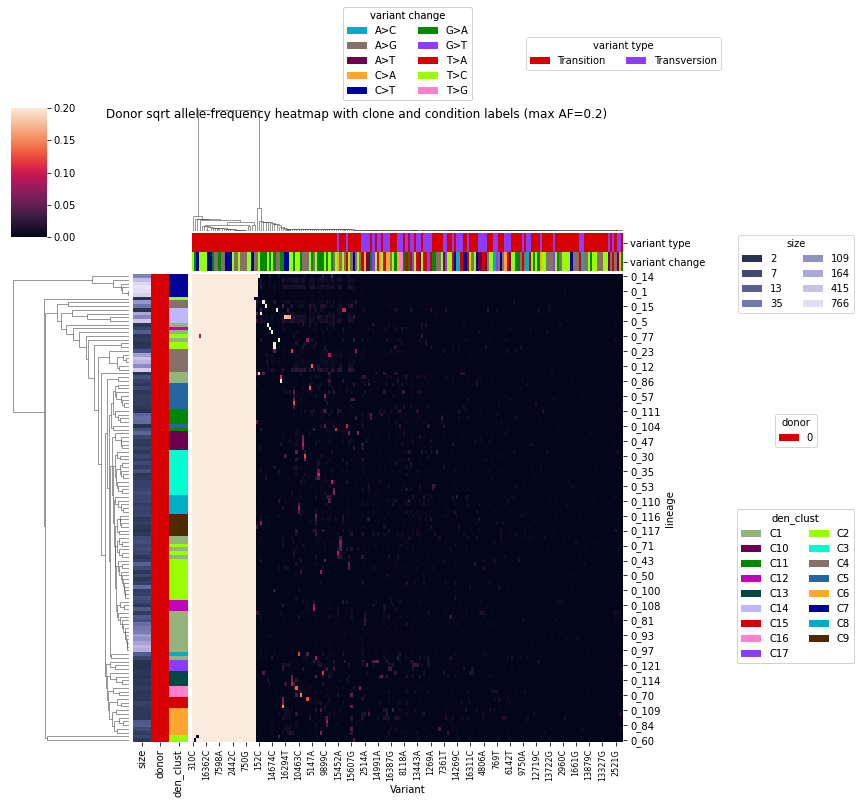

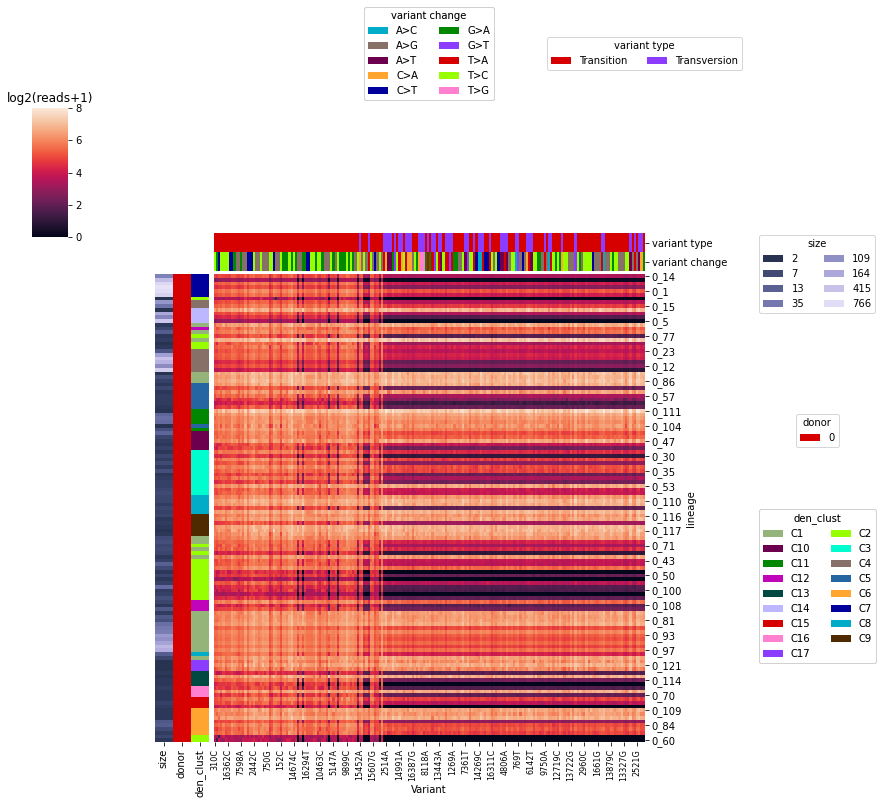

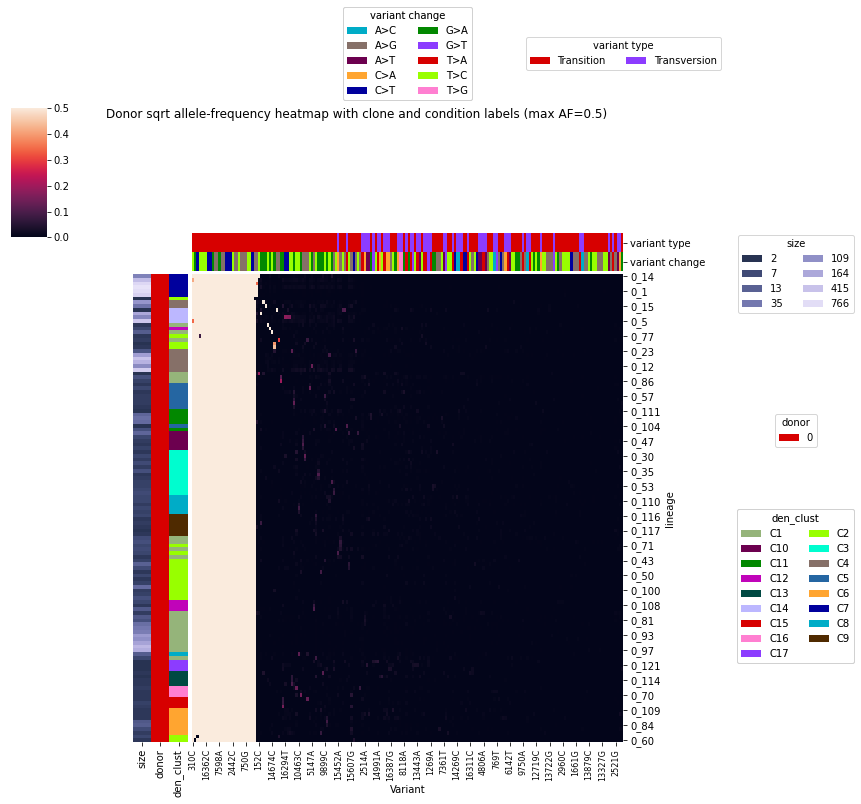

In [21]:
if not (mean_af.shape[0] == 1 or  mean_af.shape[1] == 1 ):
    g = ch.plot_cluster(mean_af,row_meta=curr_clones, to_row_clust=True, to_col_clust=True,
                        col_meta=variants_df[["variant type", "variant change"]], col_clr_schemes="categorical",
                        row_clr_schemes={"size":"sequential","donor":"categorical","den_clust":"categorical"}, 
                        vmax=0.2, vmin=0, 
                        row_linkage=link)
    plt.suptitle("Donor sqrt allele-frequency heatmap with clone and condition labels (max AF=0.2)")
    #fu.helper_save(out_f+"withEnrichmentFoldChange.NoCondition.clust.max2.AF.png",to_pdf=False)
    fu.helper_save(out_f+".dendro.NoCondition.max2.AF.png",to_pdf=False, to_svg=True)

    inds = g.dendrogram_row.dendrogram["leaves"]
    cols = g.dendrogram_col.dendrogram["leaves"]

    g1d = ch.plot_cluster(mean_dp.iloc[inds, cols], row_meta=curr_clones, to_row_clust=False, to_col_clust=False,
                          row_clr_schemes={"size":"sequential","donor":"categorical","den_clust":"categorical"}, 
                          col_meta=variants_df[["variant type", "variant change"]], col_clr_schemes="categorical",
                         )
    g1d.ax_cbar.set_title("log2(reads+1)")
    fu.helper_save(out_f+".dendro.NoCondition.DP.png",to_pdf=False, to_svg=True)#, f=g1d.figure)


    mean_af = mean_af.iloc[inds,cols]
    curr_clones = curr_clones.loc[mean_af.index]

    ch.plot_cluster(mean_af,row_meta=curr_clones, to_row_clust=False, to_col_clust=False,
                    col_meta=variants_df[["variant type", "variant change"]], col_clr_schemes="categorical",
                    row_clr_schemes={"size":"sequential","donor":"categorical","den_clust":"categorical"}, 
                    vmax=0.5, vmin=0)
    plt.suptitle("Donor sqrt allele-frequency heatmap with clone and condition labels (max AF=0.5)")
    #fu.helper_save(out_f+"withEnrichmentFoldChange.NoCondition.clust.max5.AF.png",to_pdf=False)
    fu.helper_save(out_f+".dendro.NoCondition.max5.AF.png",to_pdf=False, to_svg=True)

else:
    f = plt.figure()
    plt.title("no cells")
    f.savefig(out_f+".dendro.NoCondition.max2.AF.png")


### Save mean_af and curr_clonnes

In [22]:

mean_af.to_csv(out_f+".mean.csv")
curr_clones.to_csv(out_f+".clones_dendro.csv")